[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

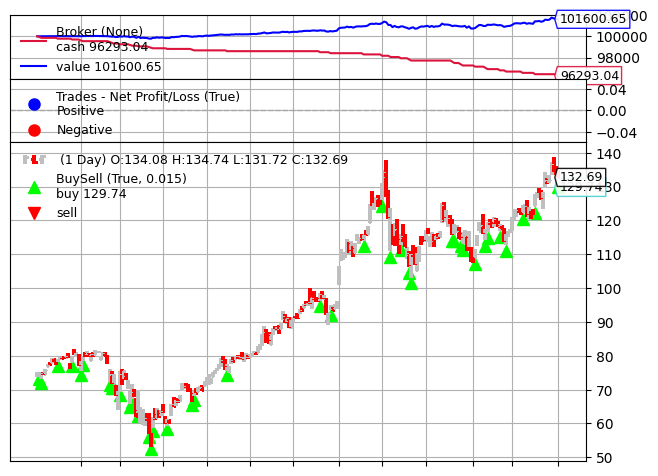

In [15]:
%matplotlib inline

import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt


# Create a Strategy
class TestStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[0] < self.dataclose[-1]:
            if self.dataclose[-1] < self.dataclose[-2]:
                self.buy()

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TestStrategy)

# Download data using yfinance
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

# Convert the data to a format that Backtrader can use
data_feed = bt.feeds.PandasData(dataname=data)

# Add the Data Feed to Cerebro
cerebro.adddata(data_feed)

# Set our desired cash start
cerebro.broker.setcash(100000.0)

# Run over everything
cerebro.run()

# Plot the result
cerebro.plot(iplot=True, volume=False)[0][0]

[*********************100%***********************]  1 of 1 completed


<IPython.core.display.Javascript object>

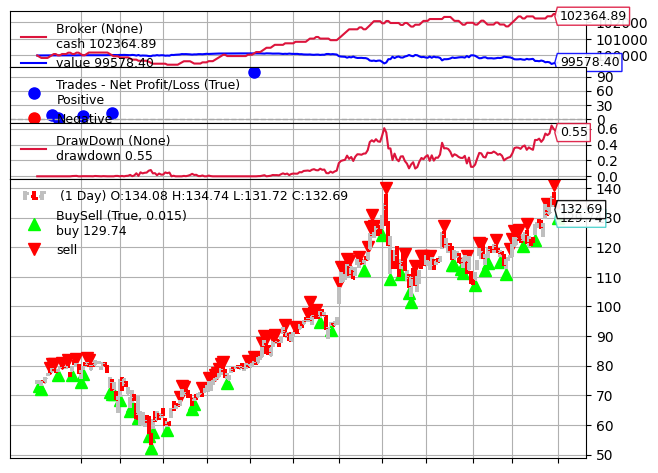

In [28]:
import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Create a Strategy
class TestStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[0] < self.dataclose[-1]:
            if self.dataclose[-1] < self.dataclose[-2]:
                self.buy()

        # Sell signal: price increases for two consecutive days
        if self.dataclose[0] > self.dataclose[-1]:
            if self.dataclose[-1] > self.dataclose[-2]:
                self.sell()

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TestStrategy)

# Add the DrawDown analyzer
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

# Download data using yfinance
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

# Convert the data to a format that Backtrader can use
data_feed = bt.feeds.PandasData(dataname=data)

# Add the Data Feed to Cerebro
cerebro.adddata(data_feed)

# Set our desired cash start
cerebro.broker.setcash(100000.0)
cerebro.addobserver(bt.observers.DrawDown)

# Run over everything
results = cerebro.run()

# Extract the drawdown analyzer
drawdown = results[0].analyzers.drawdown.get_analysis()
annual_return = results[0].analyzers.annual_return.get_analysis()
time_return = results[0].analyzers.time_return.get_analysis()

# Plot the result
cerebro.plot(iplot=True)[0][0]


In [31]:
annual_return

OrderedDict([(2020, -0.004215975570678765)])

In [30]:
time_return

OrderedDict([(datetime.datetime(2020, 1, 2, 0, 0), 0.0),
             (datetime.datetime(2020, 1, 3, 0, 0), 6.999969481835677e-07),
             (datetime.datetime(2020, 1, 6, 0, 0), 2.094992124823669e-05),
             (datetime.datetime(2020, 1, 7, 0, 0), -7.049713096840549e-06),
             (datetime.datetime(2020, 1, 8, 0, 0), 2.3999588569134644e-05),
             (datetime.datetime(2020, 1, 9, 0, 0), 3.219876933435728e-05),
             (datetime.datetime(2020, 1, 10, 0, 0), 4.174661709210881e-06),
             (datetime.datetime(2020, 1, 13, 0, 0), 3.2748246605596165e-06),
             (datetime.datetime(2020, 1, 14, 0, 0), 1.004926247283322e-05),
             (datetime.datetime(2020, 1, 15, 0, 0), 3.349695066434677e-06),
             (datetime.datetime(2020, 1, 16, 0, 0), -5.624484515465156e-06),
             (datetime.datetime(2020, 1, 17, 0, 0), 0.0),
             (datetime.datetime(2020, 1, 21, 0, 0), 1.549854466542655e-06),
             (datetime.datetime(2020, 1, 22, 0, 0)

[*********************100%***********************]  1 of 1 completed


Annual Returns:
2020: -0.42%

Portfolio Value for Every Date:
                  Return
Date                    
2020-01-02  0.000000e+00
2020-01-03  6.999969e-07
2020-01-06  2.094992e-05
2020-01-07 -7.049713e-06
2020-01-08  2.399959e-05
...                  ...
2020-12-24 -2.129276e-04
2020-12-28 -9.952854e-04
2020-12-29  4.161220e-04
2020-12-30  2.541887e-04
2020-12-31  2.136459e-04

[253 rows x 1 columns]


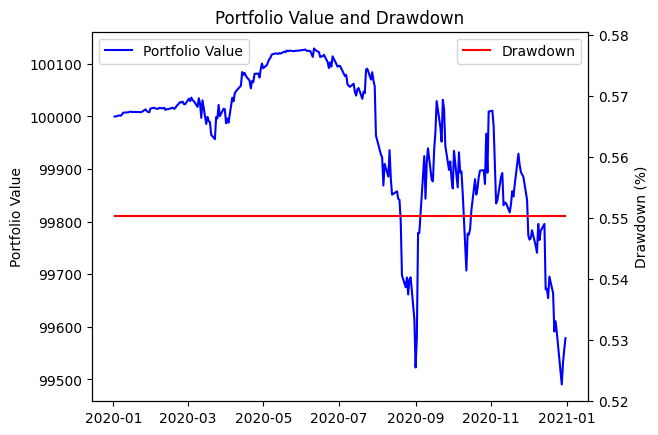

In [32]:
import backtrader as bt
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Ensure plots are rendered inline in Jupyter Notebook
%matplotlib inline

# Create a Strategy
class TestStrategy(bt.Strategy):
    def __init__(self):
        self.dataclose = self.datas[0].close

    def next(self):
        if self.dataclose[0] < self.dataclose[-1]:
            if self.dataclose[-1] < self.dataclose[-2]:
                self.buy()

        # Sell signal: price increases for two consecutive days
        if self.dataclose[0] > self.dataclose[-1]:
            if self.dataclose[-1] > self.dataclose[-2]:
                self.sell()

# Create a cerebro entity
cerebro = bt.Cerebro()

# Add a strategy
cerebro.addstrategy(TestStrategy)

# Add the DrawDown, AnnualReturn, and TimeReturn analyzers
cerebro.addanalyzer(bt.analyzers.DrawDown, _name='drawdown')
cerebro.addanalyzer(bt.analyzers.AnnualReturn, _name='annual_return')
cerebro.addanalyzer(bt.analyzers.TimeReturn, _name='time_return')

# Download data using yfinance
data = yf.download('AAPL', start='2020-01-01', end='2021-01-01')

# Convert the data to a format that Backtrader can use
data_feed = bt.feeds.PandasData(dataname=data)

# Add the Data Feed to Cerebro
cerebro.adddata(data_feed)

# Set our desired cash start
cerebro.broker.setcash(100000.0)

# Run over everything
results = cerebro.run()

# Extract the analyzers
drawdown = results[0].analyzers.drawdown.get_analysis()
annual_return = results[0].analyzers.annual_return.get_analysis()
time_return = results[0].analyzers.time_return.get_analysis()

# Print the annual returns
print("Annual Returns:")
for year, ret in annual_return.items():
    print(f"{year}: {ret:.2%}")

# Convert time return to a DataFrame for easier handling
time_return_df = pd.DataFrame(list(time_return.items()), columns=['Date', 'Return'])
time_return_df['Date'] = pd.to_datetime(time_return_df['Date'])
time_return_df.set_index('Date', inplace=True)

# Print the portfolio value for every date
print("\nPortfolio Value for Every Date:")
print(time_return_df)

# Plot the result
fig, ax1 = plt.subplots()

# Plot portfolio value
ax1.plot(time_return_df.index, (time_return_df['Return'] + 1).cumprod() * 100000, label='Portfolio Value', color='blue')
ax1.set_ylabel('Portfolio Value')
ax1.legend(loc='upper left')

# Plot drawdown
ax2 = ax1.twinx()
drawdown_series = pd.Series(drawdown.drawdown, index=data.index)
ax2.plot(drawdown_series.index, drawdown_series, label='Drawdown', color='red')
ax2.set_ylabel('Drawdown (%)')
ax2.legend(loc='upper right')

plt.title('Portfolio Value and Drawdown')
plt.show()